# Basic Movie Recommendation System
**By: Sameeha Ramadhan**

In this project I will construct a simple recommmendation system using the Netflix Title Movie Dataset found on kaggle.com. This system should take in a movie name and ouput a number of suggested movies.

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
movies=pd.read_csv('data/netflix_titles.csv')

In [2]:
movies.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


**The "movies" dataset has the following features:**

* show_id: Unique ID for every Movie / Tv Show
* type: Identifier - A Movie or TV Show
* title: Title of the Movie / Tv Show
* director: Director of the Movie
* cast: Cast members of the movie / show
* country: Country where the movie / show was produced
* date_added:  Date it was added on Netflix
* release_year:  Actual release year of the move / show
* rating: The production's TV rating (i.e. PG-13, TV-MA, etc.)
* duration: Total Duration - in minutes or number of seasons
* listed_in:  The genre
* description: A brief description of the movie

So now that I've identifited the features I will visualize the data to get a better understanding:

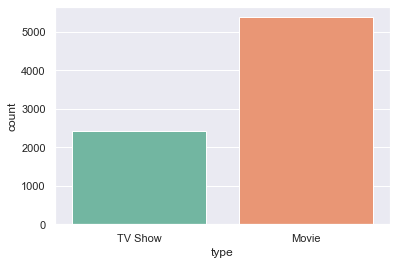

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=movies, palette="Set2")

I'll now define variables for my production types:

In [10]:
netflix_shows=movies[movies['type']=='TV Show']
netflix_movies=movies[movies['type']=='Movie']

I'm curious to see when the best month would be to release a new movie or show on Netflix for maximum exposure. A month with the least amount of releases would be ideal because Netflix users are known to binge-watch shows and are continuously looking for new recommendations. I will plot a heatmap below of the release counts by month over the last 13 years:

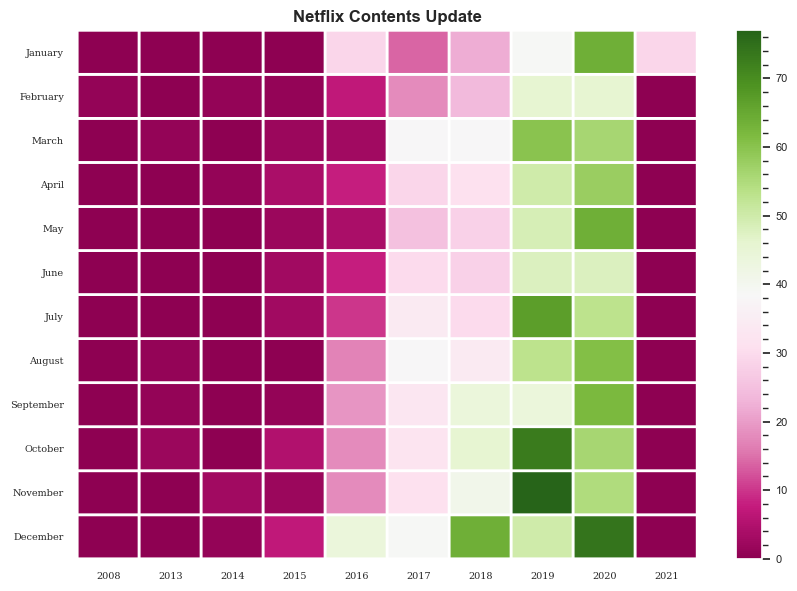

In [25]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=100)
plt.pcolor(df, cmap='PiYG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Based on the last 2 full years (2019 and 2020, January, February, and September have the least amount of releases.

In [ ]:
movies.drop(axis=1, columns='title_y')

In [23]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Demographic Filtering:

Demographic Filtering offers generalized recommendations based on movie popularity and/or genre. The general pattern of this system is that the more popular and critically acclaimed the movie, the higher chance it has of being preferred by the user. This system recommends the same movies to users with similar demographic features and since each user is unique, this system is far too simple in approach. 

I will demonstrate a basic system using this type of filtering because such a system does have its benefits. So to begin we need to establish a metric to rate the movie, calculate its rating, and then sort and recommend the best rated movie. 

To simply use the average ratings will be biased since a movie with a 9.5 rating with 5 votes can't be fairly compared to a movie with a 8.2 average with 80 votes. 

So after doing some research, I've come across the weighted rating formula IMDB uses to rate their movies. Straight from their website:

*The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:*

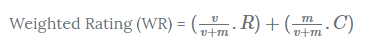

**weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C**

*Where:*

*R = average for the movie (mean) = (rating)*

*v = number of votes for the movie = (votes)*

*m = minimum votes required to be listed in the Top Rated list (currently 25,000)*

*C = the mean vote across the whole report*

So far we have **v** (vote_count) and **R** (vote_average). We can calculate **C** as the following:

In [25]:
C= movies['vote_average'].mean()
print("The mean rating for all of the movies is {} on a scale of 10".format(C))

The mean rating for all of the movies is 6.092171559442016 on a scale of 10


Next, we need to determine an appropriate value for **m**, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.